# QUESTION 1

The Standard Deviation (SD) of a data set is simply the measure of how spread out individual data points are around the mean. So a larger standard deviation would indicate that the points are farther spread out from the mean, while a smaller SD would mean that the data points are generally closer to the mean. 1 SD covers about 68% of the data set, so 34% on either side of the mean of the data set. 2 SD covers about 95% of the data so about 47% of on either side of the mean of the data set.

The Standard Error of the Mean (SEM) is the variation that would be expected from the sample mean if you take multiple samples from the same population. It relates to boostrapping because it also helps to quantify the variability of the sample mean, but while bootstrapping actually simulates the possible version of the sample, SEM just gives an approximation. SEM is also calculated by using the SD.

Essentially, SD measures the spread of the data points in the sample while SEM shows how much the mean would change if a bunch of samples were taken from the population.

# QUESTION 2

Using the SEM to create a 95% confidence level interval which "covers 95% of the bootstrapped sample means" would actually be pretty simple. First we calculate the SEM using the SD and the sqrt of the sample size. Then we can pull up a Z-Score chart from the internet and use it to see where the 95% confidence level would be. Afterwards the caculation is pretty simple, because according to ChatGPT the formula for a confidence level is the sample mean of the dataset ± z-score * SEM. This would give the range that would contain the actual population mean with a 95% confidence level.

# QUESTION 3

If we aren't able to use the the SEM, then it is possible to use a precentile based approach instead. This works by generating a large about of bootstrap samples and then taking their means and putting them on a chart. Afterwards you would just take the range of data points such that the central 95% of the sample means are within the range. This would give us a 95% bootstrapped confidence interval.

# QUESTION 4

This is the code I had ChatGPT generate for me, I changed a couple lines so that the code would run how I wanted it to and made sure that I understood how the code works:

In [8]:
import numpy as np

# Create a sample of data (example: sample of weights in kg)
np.random  
sample = np.random.normal(loc=70, scale=10, size=100)  # Generate 100 data points with mean 70kg, SD 10kg

# Define the number of bootstrap samples
n_bootstrap_samples = 1000

# Function to calculate the bootstrap confidence interval for any statistic
def bootstrap_ci(sample, statistic_function, n_bootstrap_samples=1000, ci=95):
    """
    Calculates the bootstrap confidence interval for a given statistic.

    Parameters:
    - sample: The original data sample.
    - statistic_function: A function that calculates the statistic of interest (e.g., mean, median).
    - n_bootstrap_samples: Number of bootstrap samples to generate (default is 1000).
    - ci: Confidence interval percentage (default is 95%).

    Returns:
    - The lower and upper bounds of the confidence interval.
    """
    # Generate bootstrap samples and calculate the statistic for each sample
    bootstrap_stats = [statistic_function(np.random.choice(sample, size=len(sample), replace=True)) 
                       for _ in range(n_bootstrap_samples)]
    
    # Sort the bootstrap statistics to find the percentiles
    bootstrap_stats = np.sort(bootstrap_stats)
    
    # Calculate the percentiles for the confidence interval (e.g., 2.5th and 97.5th percentiles for 95% CI)
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    
    # Find the lower and upper bounds of the confidence interval
    lower_bound = np.percentile(bootstrap_stats, lower_percentile)
    upper_bound = np.percentile(bootstrap_stats, upper_percentile)
    
    return lower_bound, upper_bound

# Statistic function for the mean
def mean_statistic(data):
    """
    Calculate the mean of a given dataset.
    
    Parameters:
    - data: The input dataset.
    
    Returns:
    - The mean of the dataset.
    """
    return np.mean(data)

# Calculate the 95% bootstrap confidence interval for the mean of the sample
ci_lower, ci_upper = bootstrap_ci(sample, mean_statistic)

# Display the result
(ci_lower, ci_upper)

(68.95747417895505, 72.99731414819318)

# QUESTION 5

The population parameter is the true, but often unknown value that gives a characteristic of the entire population, such as the true mean. The reason that it's usuall unknown is because we can't actually observe it unless we have that data from the entire population. 
On the other hand, the sample statistic is the value that we calculate from out sample of the population. It's different from the population paramter because it's essentially a guess based on the data that we already have. This is also why different samples of the population would give us different sample statistics.

We use sample statistics to construct a range of values that we can be x% confident in, that it contains the true population parameter we actually want to know about. The sample statistic is what we base our confidence interval one, and the whole point of the confidence interval is to estimate what the population parameter is. 

# QUESTION 6

1. Bootstrapping is the process of estimating the distribution of a statistic by sampling the data we were able to collect. So basically we collect a sample from the population of some statistic that we want to know more about. Then we take random samples from that sample, but we replace the samples that we took before so that those samples have a chance of being selected again. This way a number from that original sample might show up in the bootstrap sample multiple samples. Then from each boostrap sample we get the statistic we were looking for (range, median, mean, etc.). We then do that a bunch of times to build a distribution of the statistic we're looking for, then we user that data to make our inferences. Basically, we sample a sample thousands of times to get a distribution.
2. There can be a couple of reasons why we might want to use bootstrapping, but there are a couple of the most important reasons. We might do it if we couldn't collect much data and our sample was too small to make any assumptions, so we use bootstrapping to build a distribution of the statistic we're looking for to then make our assumptions about that distribution. Another reason it could be used is if we don't know the population distribution, which is useful for caluculating things like probabilities and confidence intervals.
3. So we would use the process of bootstrapping (that I explain in part 1) to get a bunch of bootstrap samples from the original sample. Then we would calculate the average of the bootstrap samples and plot it. Repeat a couple thousand times until there is a distribution of what the sample means might look like. I would then compare my hypothesized average with the boostrap distribution, and then seeing if it is within a good confidence interval. For example if it is outside of the 95% confidence interval, then it's not very likely to be plausible. 

# QUESTION 7

The reason that a confidence interval overlapping zero fails to reject a null hypothesis is because even though a confidence interval might overlap with zero, it might mean that zero is a possible value for the population. But the reason that we fail to reject the null hypothesis is because the data doesn't actually provide strong evidence for us to confidently rule out the possibility that zero is plausible value for the population absed on our data.
To reverse it, in order for us to be able to confidently reject the null hypothesis, the confidence interval can't include zero. This would mean that all the plausible values for the dataset are either all positive or all negative, but either way there is strong evidence that there is some change happening. So we would be able to conclude that our findings are statistically significant in one way or another.

# QUESTION 8

I asked ChatGPT to provide me with code that uses bootstrappiong for analyzing the change in health scores and how it is impacted by age and gender, I also asked it to include another graph that shows the 95% confidence interval for the change in the distribution of the average health score.

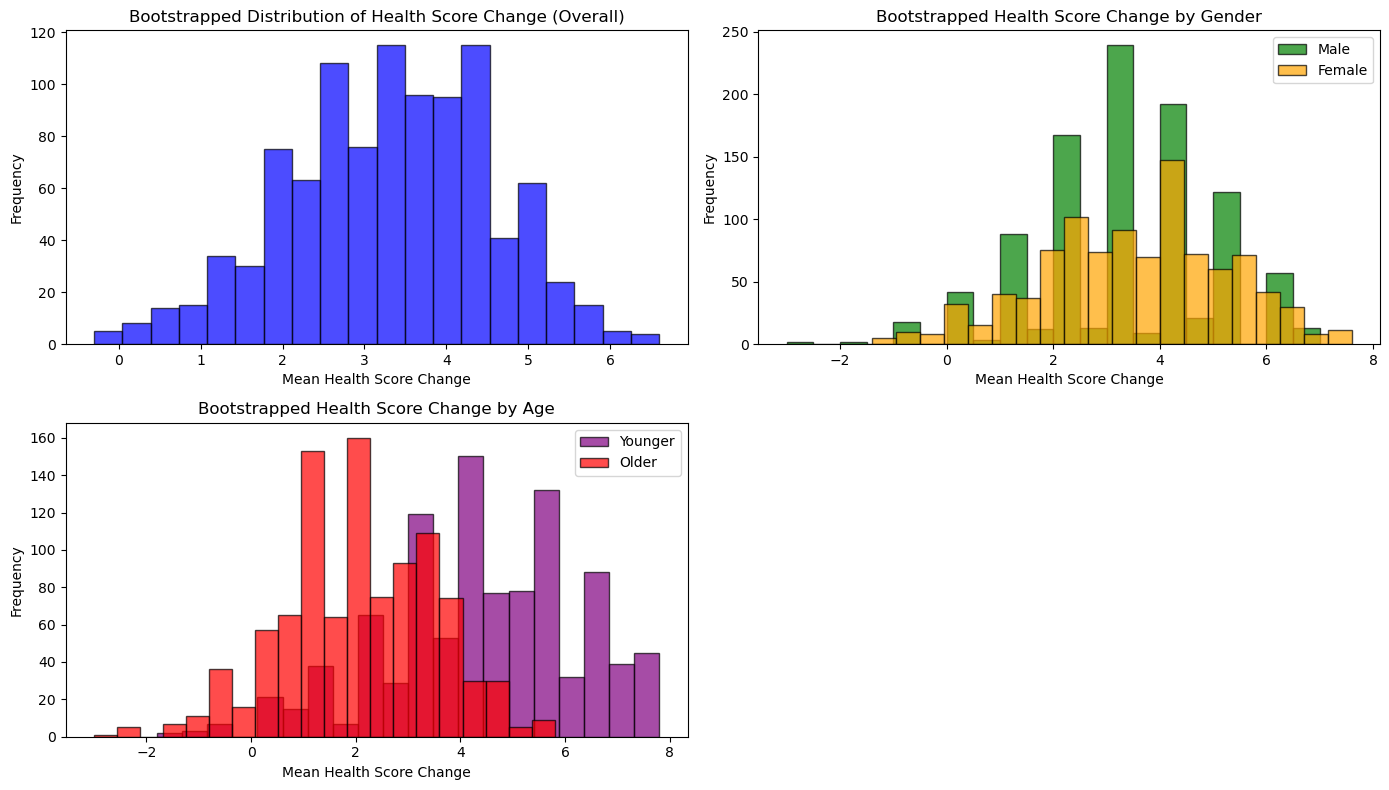

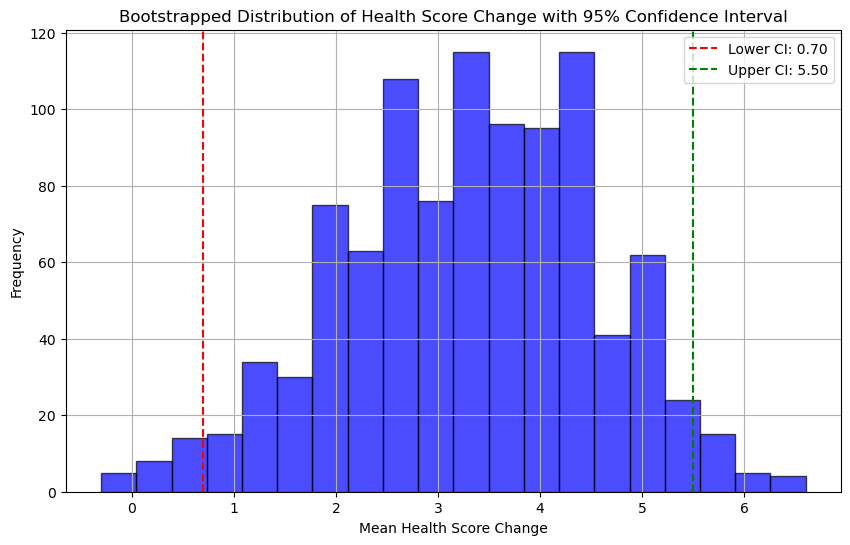

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the difference in health scores (Final - Initial)
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping function to estimate the distribution of health score changes
def bootstrap_health_score_change(data, n_bootstrap_samples=1000):
    """
    Bootstraps the health score change and returns the bootstrap mean changes for each sample.
    
    Parameters:
    - data: The original dataset.
    - n_bootstrap_samples: Number of bootstrap samples.
    
    Returns:
    - A list of bootstrapped mean changes.
    """
    bootstrapped_means = []
    for _ in range(n_bootstrap_samples):
        resampled_data = np.random.choice(data['HealthScoreChange'], size=len(data), replace=True)
        bootstrapped_means.append(np.mean(resampled_data))
    
    return bootstrapped_means

# Bootstrapping for the entire dataset
boot_means = bootstrap_health_score_change(data)

# Bootstrapping for health score change by gender
boot_means_male = bootstrap_health_score_change(data[data['Gender'] == 'M'])
boot_means_female = bootstrap_health_score_change(data[data['Gender'] == 'F'])

# Bootstrapping for health score change by age groups (e.g., younger vs older)
age_threshold = data['Age'].median()  # Using median age to split the groups
boot_means_younger = bootstrap_health_score_change(data[data['Age'] <= age_threshold])
boot_means_older = bootstrap_health_score_change(data[data['Age'] > age_threshold])

# Plotting the bootstrapped distributions
plt.figure(figsize=(14, 8))

# Plot for overall distribution of health score change
plt.subplot(2, 2, 1)
plt.hist(boot_means, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Bootstrapped Distribution of Health Score Change (Overall)')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')

# Plot for health score change by gender (Male vs Female)
plt.subplot(2, 2, 2)
plt.hist(boot_means_male, bins=20, color='green', edgecolor='black', alpha=0.7, label='Male')
plt.hist(boot_means_female, bins=20, color='orange', edgecolor='black', alpha=0.7, label='Female')
plt.title('Bootstrapped Health Score Change by Gender')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()

# Plot for health score change by age (Younger vs Older)
plt.subplot(2, 2, 3)
plt.hist(boot_means_younger, bins=20, color='purple', edgecolor='black', alpha=0.7, label='Younger')
plt.hist(boot_means_older, bins=20, color='red', edgecolor='black', alpha=0.7, label='Older')
plt.title('Bootstrapped Health Score Change by Age')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Function to calculate the 95% confidence interval from bootstrap means
def calculate_confidence_interval(boot_means, confidence_level=95):
    """
    Calculate the confidence interval for the bootstrap means.
    
    Parameters:
    - boot_means: A list of bootstrapped means.
    - confidence_level: The confidence level for the interval (default is 95%).
    
    Returns:
    - lower_bound, upper_bound: The lower and upper bounds of the confidence interval.
    """
    lower_bound = np.percentile(boot_means, (100 - confidence_level) / 2)
    upper_bound = np.percentile(boot_means, 100 - (100 - confidence_level) / 2)
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the overall bootstrapped health score change
ci_lower, ci_upper = calculate_confidence_interval(boot_means)

# Plot the bootstrapped distribution with the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.hist(boot_means, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='--', label=f'Lower CI: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'Upper CI: {ci_upper:.2f}')
plt.title('Bootstrapped Distribution of Health Score Change with 95% Confidence Interval')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The average health score change for the overall sample is positive, meaning that there is a general improvement in health scores after the vaccine was administered. After bootstrapping for a whole bunch of data, the mean health score change revealed itself to be unmodal and with the mean seeming to be somewhere around the 3.2 point mark, which seems to indicate that on average the healthy score does improve. 

When bootstrapping by gender, the data reveals something very interesting in that the males had a wider range of healthy score changes, so while some saw a major increase, others seemed to even undergo a slight decline. Meanwhile the female scores are more concentrated for the females, showing that the females seem to have a more consistent positive reaction to this vaccine.

When bootstrapping by age (and using the median age as the threshold by which it is determined if data is considered as belonging to a "younger" or "older" person. The younger population definately saw a much higher increase in their health scores. Both the young and old distributions seem to be unimodal, but the mean of the graph representing the younger people, seems to be several points higher than that over the graph representing the old people, thus suggesting that the vaccine has a lesser effect on the older people.

Finally, when looking at the Bootstrapped Distribution of Health Score Change with 95% Confidence Interval graph, we can see that 0 is well outside of the 95% confidence level. As discussed in Question 7, this means that we are able to confidently dismiss the null hypothesis, since all of the plausible values for the mean health score change are well within the positive, meaning that all the plausible values for the dataset are all positive, showing there is strong evidence that there is some positive change happening.

I also got curious about how gender and age were distributed amongst the patients so I had ChatGPT write this code:

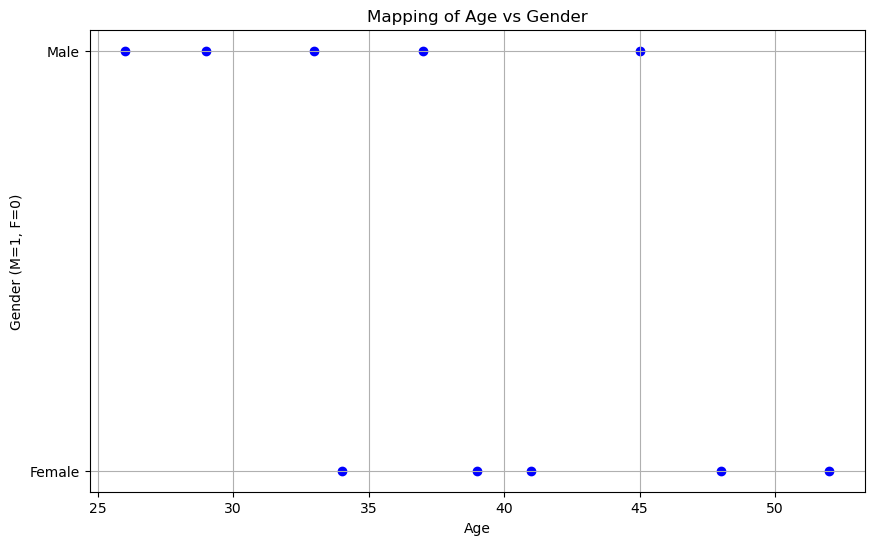

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Convert gender to numeric values for easier visualization (M: 1, F: 0)
data['GenderNumeric'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

# Plotting the relationship between Age and Gender
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data['Age'], data['GenderNumeric'], color='blue')

# Customize the plot
plt.title('Mapping of Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender (M=1, F=0)')
plt.yticks([0, 1], ['Female', 'Male'])  # Set proper labels for Gender axis
plt.grid(True)

plt.show()


And even though it showed that the females were older on average, I wasn't able to make any interesting correlations with the previous graphs.

# QUESTION 9

Yes.